In [13]:

%pip install -q keras
%pip install tensorflow keras numpy pandas matplotlib opencv-python-headless



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
import os 

images = os.listdir('/Users/sayeshagoel/Desktop/inspirit ai /AugmentedAlzheimerDataset copy/Training folder')
images[:10]

["Alzheimer's Disease", '.DS_Store', 'Control', 'Mild Cognitive Impairment']

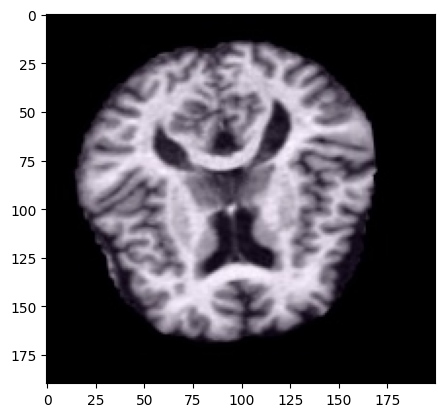

In [15]:
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import os
import random

import matplotlib.image as img
import cv2

from keras.preprocessing.image import ImageDataGenerator

testImage = img.imread('/Users/sayeshagoel/Desktop/inspirit ai /AugmentedAlzheimerDataset/Training folder/MildDemented/0a2b4950-93a0-4854-a7d7-e73548c479c0.jpg') 
plt.imshow(testImage) 

In [16]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split


In [17]:
trainingImagePath = "/Users/sayeshagoel/Desktop/inspirit ai /AugmentedAlzheimerDataset/Training folder"
testingImagePath = "/Users/sayeshagoel/Desktop/inspirit ai /AugmentedAlzheimerDataset/test"
validationImagePath = "/Users/sayeshagoel/Desktop/inspirit ai /AugmentedAlzheimerDataset/validation"

train_dataGen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,                # Applaying these all Data Augmentations
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


test_dataGen = ImageDataGenerator(rescale = 1.0/255)

training_set = train_dataGen.flow_from_directory(
    trainingImagePath,
    target_size=(128, 128),
    batch_size = 32,
    class_mode = 'categorical'

)


test_set = test_dataGen.flow_from_directory(
    testingImagePath,
    target_size=(128, 128),
    batch_size = 32,
    class_mode = 'categorical'

)

valid_set = test_dataGen.flow_from_directory(
    validationImagePath,
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'categorical'
)


Found 33984 images belonging to 4 classes.
Found 89 images belonging to 4 classes.
Found 89 images belonging to 4 classes.


In [18]:
test_set.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented ': 2,
 'VeryMildDemented': 3}

In [19]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

# Initialize the CNN
classifier = Sequential()

# Add convolutional layers
classifier.add(Convolution2D(32, kernel_size=(3, 3), strides=(1, 1), input_shape=(128, 128, 3), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPool2D(pool_size=(2, 2)))

classifier.add(Convolution2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPool2D(pool_size=(2, 2)))

classifier.add(Convolution2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPool2D(pool_size=(2, 2)))

classifier.add(Convolution2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPool2D(pool_size=(2, 2)))

classifier.add(Convolution2D(512, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPool2D(pool_size=(2, 2)))

# Flatten the output from convolutional layers
classifier.add(Flatten())

# Add fully connected layers
classifier.add(Dense(1024, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(512, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(training_set.num_classes, activation='softmax'))

# Compile the CNN
optimizer = Adam(learning_rate=0.0001)
classifier.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Adding learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Viewing the updated model summary
classifier.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_5 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_6 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                                                
                                                      

In [35]:
model_path = 'my_trained_model2.h5'
classifier.save(model_path)

In [31]:
model_history = classifier.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=10,  # Increase the number of epochs for more training
    validation_data=valid_set,
    validation_steps=len(valid_set),
    verbose=1,
    
)

Epoch 1/10
1062/1062 [==============================] - 654s 615ms/step - loss: 0.6992 - accuracy: 0.6693 - val_loss: 0.8545 - val_accuracy: 0.6067
Epoch 2/10
1062/1062 [==============================] - 866s 816ms/step - loss: 0.6780 - accuracy: 0.6823 - val_loss: 0.5900 - val_accuracy: 0.6629
Epoch 3/10
1062/1062 [==============================] - 639s 602ms/step - loss: 0.6586 - accuracy: 0.6947 - val_loss: 0.5442 - val_accuracy: 0.7191
Epoch 4/10
1062/1062 [==============================] - 639s 601ms/step - loss: 0.6345 - accuracy: 0.7082 - val_loss: 0.4543 - val_accuracy: 0.7865
Epoch 5/10
1062/1062 [==============================] - 651s 613ms/step - loss: 0.6241 - accuracy: 0.7133 - val_loss: 0.4970 - val_accuracy: 0.7753
Epoch 6/10
1062/1062 [==============================] - 967s 911ms/step - loss: 0.6009 - accuracy: 0.7242 - val_loss: 0.5823 - val_accuracy: 0.7640
Epoch 7/10
1062/1062 [==============================] - 651s 613ms/step - loss: 0.5802 - accuracy: 0.7313 - val_

3/3 [==============================] - 0s 96ms/step
              precision    recall  f1-score   support

           0       0.28      0.35      0.31        20
           1       0.17      0.17      0.17        23
           2       0.33      0.38      0.35        24
           3       0.21      0.14      0.17        22

    accuracy                           0.26        89
   macro avg       0.25      0.26      0.25        89
weighted avg       0.25      0.26      0.25        89



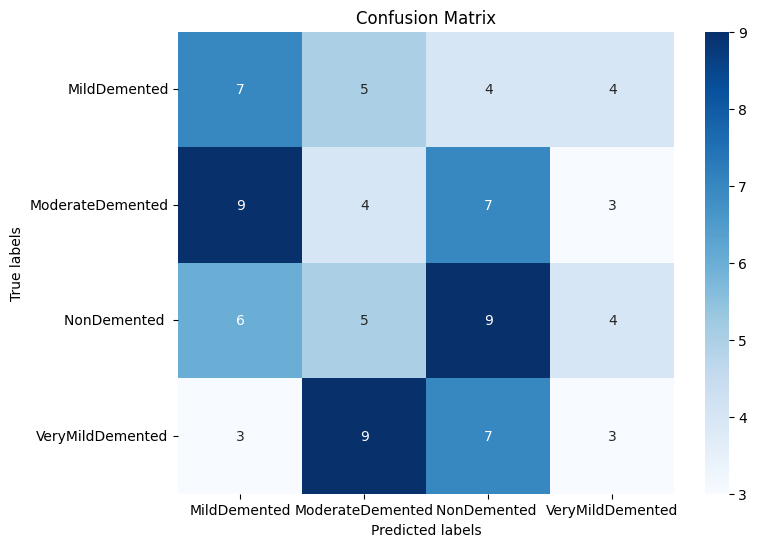

In [33]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict labels for the validation set
y_pred = classifier.predict(valid_set)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = valid_set.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Print classification report
print(classification_report(y_true, y_pred_classes))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=valid_set.class_indices.keys(), yticklabels=valid_set.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

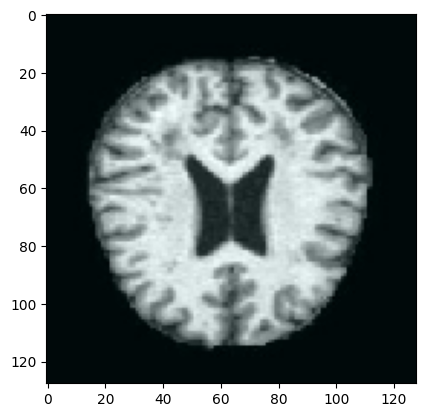

1/1 [==============================] - 0s 155ms/step
Predicted class: NonDemented


In [23]:
from keras.preprocessing import image
import numpy as np


img_path = "/Users/sayeshagoel/Desktop/inspirit ai /AugmentedAlzheimerDataset copy/test/NonDemented /0a08ccf2-0aa1-4afb-9fc7-696534e757d0.jpg"
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values

plt.imshow(img)
plt.axis('on')
plt.show()

# Predict the class probabilities
predictions = classifier.predict(img_array)

# Get the class label with highest probability
predicted_class_index = np.argmax(predictions)

class_names = list(training_set.class_indices.keys())
predicted_name = class_names[predicted_class_index]

loss = 0
# Print the predicted class
print("Predicted class:", predicted_name)



In [24]:
import pandas as pd 

AD = pd.read_csv('stats.csv')
AD

,Sample,Diagnostic,Sex,Age,MMSE,CSF Amyloid (pg/mL),CSF Total tau (pg/mL),CSF Phosphorylated tau (pg/mL),APOE4,Progression to Alzheimer's Disease,Progression time (months)
0,1,Alzheimer's Disease,Female,68,26,688.0,369.0,107.0,Yes,NaN,NaN
1,2,Alzheimer's Disease,Female,66,22,489.0,482.0,176.0,Yes,NaN,NaN
2,3,Alzheimer's Disease,Female,72,23,509.0,329.0,114.0,Yes,NaN,NaN
3,4,Alzheimer's Disease,Male,73,25,544.0,482.0,80.0,No,NaN,NaN
4,5,Alzheimer's Disease,Female,75,15,303.0,806.0,120.0,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
207,208,Control,Female,74,28,1004.0,314.0,58.8,No,NaN,NaN
208,209,Control,Female,76,28,1215.0,312.0,51.7,No,NaN,NaN
209,210,Control,Female,67,30,470.0,86.2,15.6,No,NaN,NaN
210,211,Control,Male,71,29,712.0,463.0,87.3,No,NaN,NaN


0      1
1      1
2      1
3      1
4      1
      ..
207    0
208    0
209    0
210    0
211    0
Name: new_column, Length: 212, dtype: int64


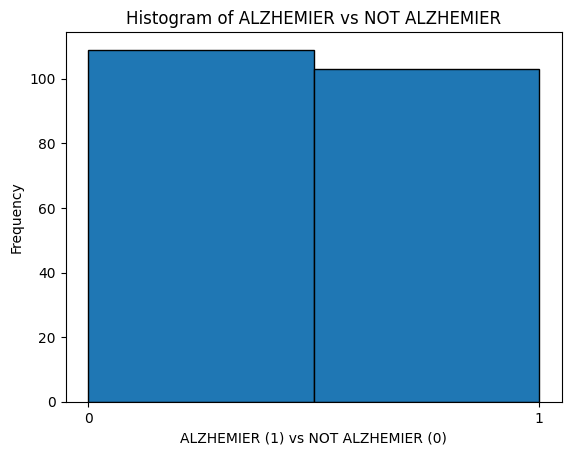

((212, 1),)

In [25]:
from sklearn.linear_model import LogisticRegression 

X_train =  AD['MMSE'].to_numpy().reshape((len(AD['MMSE']), 1))


AD['new_column'] = AD['Diagnostic'].apply(lambda x: 1 if x == "Alzheimer's Disease" else 0)
#y_train = AD['Diagnostic'].to_numpy()

#if AD['Diagnostic'] == "Alzheimer's Disease":
   # y_train = 0 
#else:
    #y_train = 1
y_train = AD['new_column'].to_numpy()
print(AD['new_column'])
#print(y_train)
import matplotlib.pyplot as plt


plt.hist(AD['new_column'], bins=2, edgecolor='black')
plt.xlabel('ALZHEMIER (1) vs NOT ALZHEMIER (0)')
plt.ylabel('Frequency')
plt.title('Histogram of ALZHEMIER vs NOT ALZHEMIER')
plt.xticks([0, 1])  # Ensure only 0 and 1 are used as x-axis labels
plt.show()

X_train.shape, #y_train.shape

In [26]:
lr = LogisticRegression().fit(X_train, y_train)
lr_predictions = lr.predict(X_train)


print(lr_predictions)



[0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1
 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1]


In [27]:

from sklearn.metrics import accuracy_score
lr_accuracy = accuracy_score(y_train, lr_predictions)
print(lr_accuracy)


0.7358490566037735


In [28]:

from sklearn.impute import SimpleImputer


AD_clean = AD.dropna(subset=['CSF Amyloid (pg/mL)', 'Diagnostic'])

imputer = SimpleImputer(strategy='mean')


X_train_2 = AD['CSF Amyloid (pg/mL)'].to_numpy().reshape(-1, 1)
y_train_2 = AD['new_column'].to_numpy()


X_train_2 = imputer.fit_transform(X_train_2)


lr_2 = LogisticRegression().fit(X_train_2, y_train_2)
lr_predictions_2 = lr_2.predict(X_train_2)
print(lr_predictions_2)
lr_accuracy_2 = accuracy_score(y_train_2, lr_predictions_2)
print(lr_accuracy_2)

[0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0
 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0
 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1]
0.6320754716981132


In [29]:
AD_clean = AD.dropna(subset=['CSF Total tau (pg/mL)', 'Diagnostic'])

imputer = SimpleImputer(strategy='mean')


X_train_3 = AD['CSF Total tau (pg/mL)'].to_numpy().reshape(-1, 1)
y_train_3 = AD['new_column'].to_numpy()
X_train_3 = imputer.fit_transform(X_train_3)

lr_3 = LogisticRegression().fit(X_train_3, y_train_3)
lr_predictions_3 = lr_3.predict(X_train_3)
print(lr_predictions_3)
lr_accuracy_3 = accuracy_score(y_train_3, lr_predictions_3)
print(lr_accuracy_3)



[0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0
 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0
 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
0.5990566037735849
